#                                             ✨                 Data-Driven Grocery Success: Predicting Sales Through Advanced Analytics

#  ◆  Purpose of the Project

####  ▪ The purpose of the project is to predict grocery sales based on various factors such as item weight, visibility, and outlet characteristics.
####  ▪ By analyzing and modeling these features, the project aims to provide insights into sales patterns, optimize inventory management, and inform business strategies to enhance sales performance and decision-making.

# ◆ Loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ◆ Initial Exploration

#### ▪ Initial Exploration involves loading the dataset and performing basic checks to understand its structure and content. 
#### ▪ This includes viewing the first few rows, summarizing statistics, and identifying missing values. 
#### ▪ These steps help establish a foundational understanding of the data and prepare it for further analysis.

In [2]:
df = pd.read_csv(r'C:\Users\91917\OneDrive\Desktop\K_class_sales_clean.csv')
print(df.head())
print(df.info())
print(df.describe())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy     249.8            OUT049   
1            Soft Drinks      48.3            OUT018   
2                   Meat     141.6            OUT049   
3  Fruits and Vegetables     182.1            OUT010   
4              Household      53.9            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 2   
1                       2009      Medium               Tier 2   
2                       1999      Medium               Tier

# ◆ Data Cleaning

#### ▪ Data Cleaning involves preparing the dataset by addressing missing values, removing duplicates, and ensuring correct data types.
#### ▪ This process ensures that the data is accurate, complete, and suitable for analysis.
#### ▪ Proper cleaning is crucial for building reliable models and obtaining meaningful insights.

In [3]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64


#  ◆ Exploratory Data Analysis (EDA)

#### ▪ Exploratory Data Analysis (EDA) involves visualizing and summarizing the dataset to uncover patterns, relationships, and anomalies. 
#### ▪ This includes creating plots like histograms, scatter plots, and box plots to understand distributions and correlations. 
#### ▪ EDA helps in generating insights and guiding subsequent analysis steps.

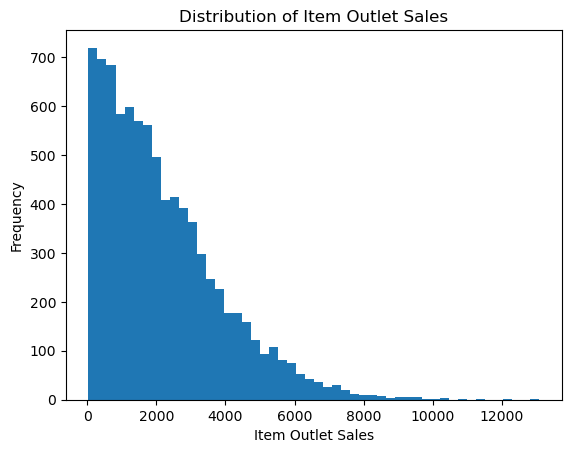

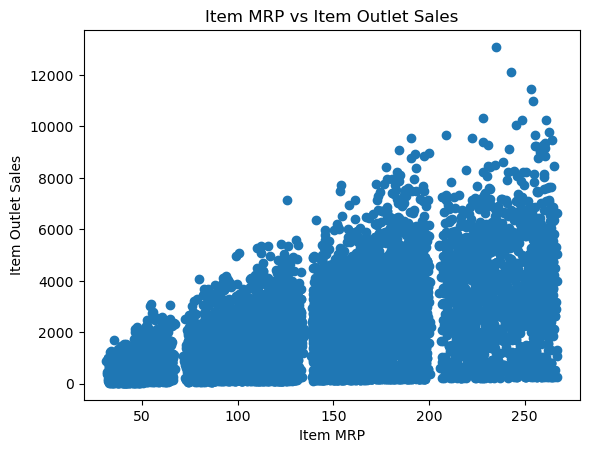

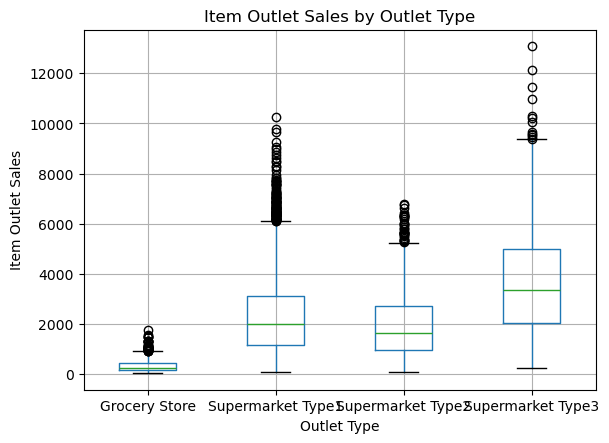

In [4]:
# Histogram
plt.hist(df['Item_Outlet_Sales'], bins=50)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

# Box plot
df.boxplot(column='Item_Outlet_Sales', by='Outlet_Type')
plt.title('Item Outlet Sales by Outlet Type')
plt.suptitle('')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()



#  ◆  Feature Engineering

#### ●  Feature Engineering involves creating new variables or modifying existing ones to improve the performance of a model. 
#### ●  This process includes generating new features, such as calculating Outlet_Age from the establishment year, and selecting relevant features that enhance the model’s predictive power.
#### ●  Effective feature engineering helps the model capture important patterns and relationships in the data.

In [5]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation of each feature with 'Item_Outlet_Sales'
print(correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False))


Item_Outlet_Sales            1.000000
Item_MRP                     0.567555
Profit                       0.000951
Item_Weight                 -0.030432
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


# ◆ Model Building and Evaluation

#### ▪  Model Building and Evaluation involves training a predictive model using the cleaned and engineered features, and then assessing its performance. 
#### ▪  This process includes splitting the data into training and testing sets, fitting a model (e.g., linear regression), and evaluating its accuracy using metrics like Mean Squared Error. 
#### ▪  It helps in understanding how well the model generalizes to unseen data and identifying areas for improvement.

In [6]:
# Create the 'Outlet_Age' feature if it doesn't exist
if 'Outlet_Age' not in df.columns:
    df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']


In [7]:
print(df.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit', 'Outlet_Age'],
      dtype='object')


In [8]:
# Prepare features and target
X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']]
y = df['Item_Outlet_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 1793779.576269062


# ◆  Comparison of Actual vs Predicted Sales

#### ▪  The Comparison of Actual vs Predicted Sales section visualizes how well the model's predictions align with the actual sales data.
#### ▪ By plotting histograms for both actual and predicted sales, you can assess the model's accuracy: overlapping distributions indicate good prediction performance, while significant discrepancies reveal areas for potential improvement.

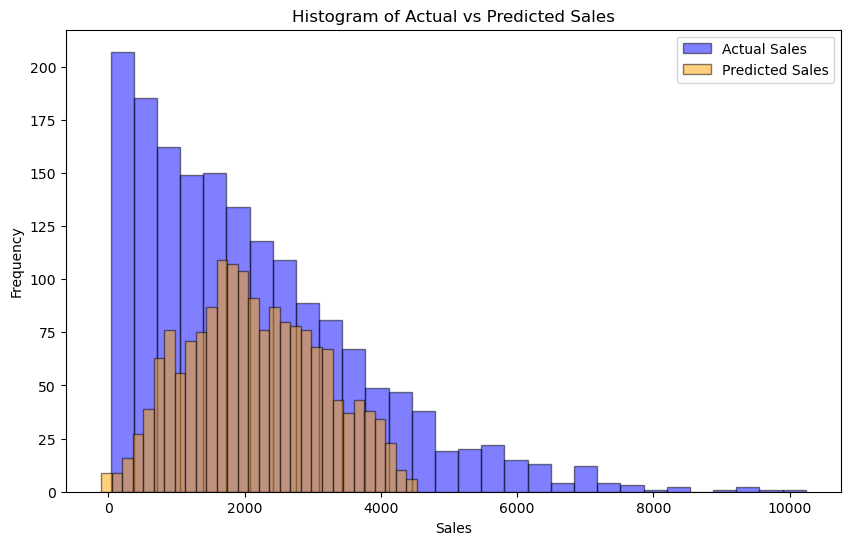

In [9]:

# Histogram of Actual Sales
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', edgecolor='black', label='Actual Sales')

# Histogram of Predicted Sales

plt.hist(y_pred, bins=30, alpha=0.5, color='orange', edgecolor='black', label='Predicted Sales')
plt.title('Histogram of Actual vs Predicted Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# ◆ Conclusion :
#### ▪ The project successfully predicts grocery sales using a linear regression model based on key features 
#### ▪ May like item weight, visibility, and outlet characteristics. 
#### ▪ Through exploratory data analysis and feature engineering, we identified important patterns and relationships in the data.
#### ▪ The model's performance, evaluated through metrics and visualizations.
#### ▪ Provides actionable insights for improving sales strategies and optimizing inventory management.
#### ▪ Further refinement and additional features could enhance prediction accuracy and provide even deeper business insights.